In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from scipy import stats
import seaborn as sns

#### This is my data exploration practice with the superstore data that i acquired from kaggle. This was done for practice purpose only and its a work in progress

#### Lets import our .csv data

In [158]:
df = pd.read_csv('train.csv', index_col = 0)

#### lets take a look at our dataframe

In [12]:
df

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880


#### lets check if we have any null values in our data

In [13]:
df.isnull().sum() # we have one columns with 11 null values, we can  delete these because it roughly amounts to 0.1% of our data

Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

#### we can deal with the null values in two ways, one my deleting them, other by filling them based on their city

In [14]:
df[df['Postal Code'].isnull()] # outputs the observations with null values for Postal Code, lets take a look:

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94


#### we can see that the missing postal code is for burlington, Vermont, lets look at the rest of the dataframe to check if there is Burlington, Vermont with zipcode that we can use

In [15]:
df[df.City == "Burlington"] # turns out, every observation with city Burlington and state Vermont are missing postal code
                            # we will then google the zip code for burlington, Vermont and fill it with fillna

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
684,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,TEC-MA-10004125,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,7999.980
685,US-2018-168116,04/11/2018,04/11/2018,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,167.440
1009,US-2018-106705,26/12/2018,01/01/2019,Standard Class,PO-18850,Patrick O'Brill,Consumer,United States,Burlington,Iowa,52601.0,Central,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",44.750
1039,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10000203,Office Supplies,Art,Newell 336,23.968
1040,CA-2018-121818,20/11/2018,21/11/2018,First Class,JH-15430,Jennifer Halladay,Consumer,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10004790,Office Supplies,Art,Staples in misc. colors,28.728
1394,CA-2018-124828,03/07/2018,04/07/2018,First Class,YS-21880,Yana Sorensen,Corporate,United States,Burlington,North Carolina,27217.0,South,OFF-AR-10003514,Office Supplies,Art,4009 Highlighters by Sanford,9.552
2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.030
2929,US-2018-120390,19/10/2018,26/10/2018,Standard Class,TH-21550,Tracy Hopkins,Home Office,United States,Burlington,North Carolina,27217.0,South,OFF-BI-10004995,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,1633.188
5066,CA-2018-142090,30/11/2018,07/12/2018,Standard Class,SC-20380,Shahid Collister,Consumer,United States,Burlington,North Carolina,27217.0,South,TEC-AC-10002001,Technology,Accessories,Logitech Wireless Gaming Headset G930,383.976


#### There are few different options to choose from for zipcode, we will go with 05408, so, lets fill the df with this

In [16]:
df['Postal Code'] = df['Postal Code'].fillna('05408')

In [21]:
df['Postal Code'] = df['Postal Code'].astype(float)
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

#### lets check again to see if we have any null values

In [24]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#### lets check the data types of these column, because eventually, we only feed numeric data type to our model

In [23]:
df.dtypes

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [25]:
df.head(10)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
Row ID,,,,,,,,,,,,,,,,,
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040


In [26]:
df.describe()

,Postal Code,Sales
count,9800.000000,9800.000000
mean,55217.351122,230.769059
std,32066.738325,626.651875
min,1040.000000,0.444000
25%,23223.000000,17.248000
50%,57551.000000,54.490000
75%,90008.000000,210.605000
max,99301.000000,22638.480000


In [27]:
df.Category.value_counts()

Office Supplies    5909
Furniture          2078
Technology         1813
Name: Category, dtype: int64

In [28]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1338
Furnishings     931
Phones          876
Storage         832
Art             785
Accessories     756
Chairs          607
Appliances      459
Labels          357
Tables          314
Envelopes       248
Bookcases       226
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

In [29]:
df['Customer Name'].value_counts() # so, we can see that this data represents only 793 unique customer and their purchase habit

William Brown        35
Matt Abelman         34
Paul Prost           34
John Lee             33
Seth Vernon          32
                     ..
Anthony O'Donnell     1
Sung Chung            1
Lela Donovan          1
Jocasta Rupert        1
Ricardo Emerson       1
Name: Customer Name, Length: 793, dtype: int64

#### Here are the top 20 customers with respect to total sales

In [72]:
top_buyers =pd.DataFrame(df.groupby(['Customer Name']).Sales.sum().sort_values( ascending = False)).head(20) # dataframe for customers and their total sales

In [73]:
top_buyers = top_buyers.reset_index()

In [74]:
top_buyers

,Customer Name,Sales
0,Sean Miller,25043.050
1,Tamara Chand,19052.218
2,Raymond Buch,15117.339
3,Tom Ashbrook,14595.620
4,Adrian Barton,14473.571
5,Ken Lonsdale,14175.229
6,Sanjit Chand,14142.334
7,Hunter Lopez,12873.298
8,Sanjit Engle,12209.438
9,Christopher Conant,12129.072


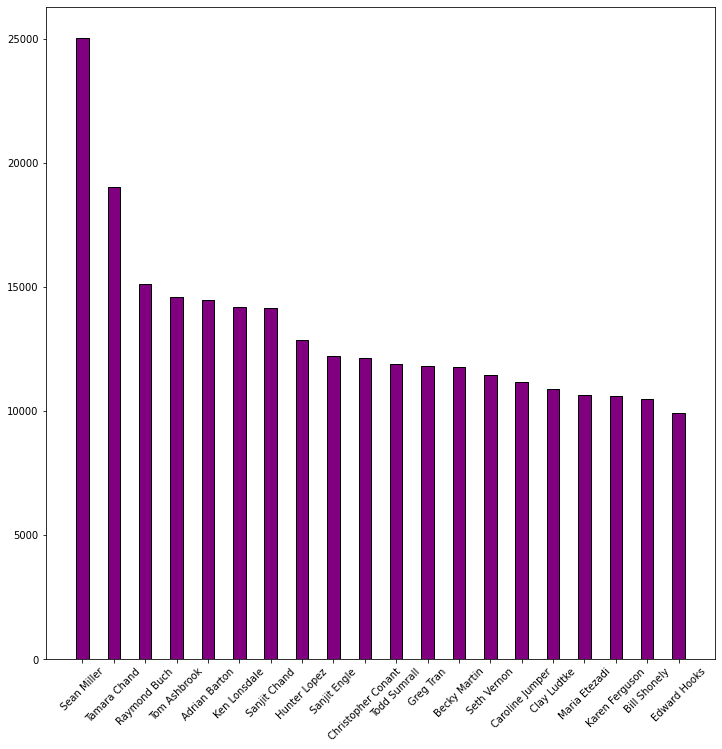

In [110]:
plt.figure(figsize = (12,12))
plt.bar(top_buyers['Customer Name'], top_buyers['Sales'], width = 0.4, ec = 'black', color = 'purple')
plt.xticks(rotation = 45)
plt.show()

#### Here are the top 20 states based on revenue

In [70]:
top_state = pd.DataFrame(df.groupby(['State']).Sales.sum().sort_values( ascending = False)).reset_index().head(20)

In [71]:
top_state

,State,Sales
0,California,446306.4635
1,New York,306361.1470
2,Texas,168572.5322
3,Washington,135206.8500
4,Pennsylvania,116276.6500
5,Florida,88436.5320
6,Illinois,79236.5170
7,Michigan,76136.0740
8,Ohio,75130.3500
9,Virginia,70636.7200


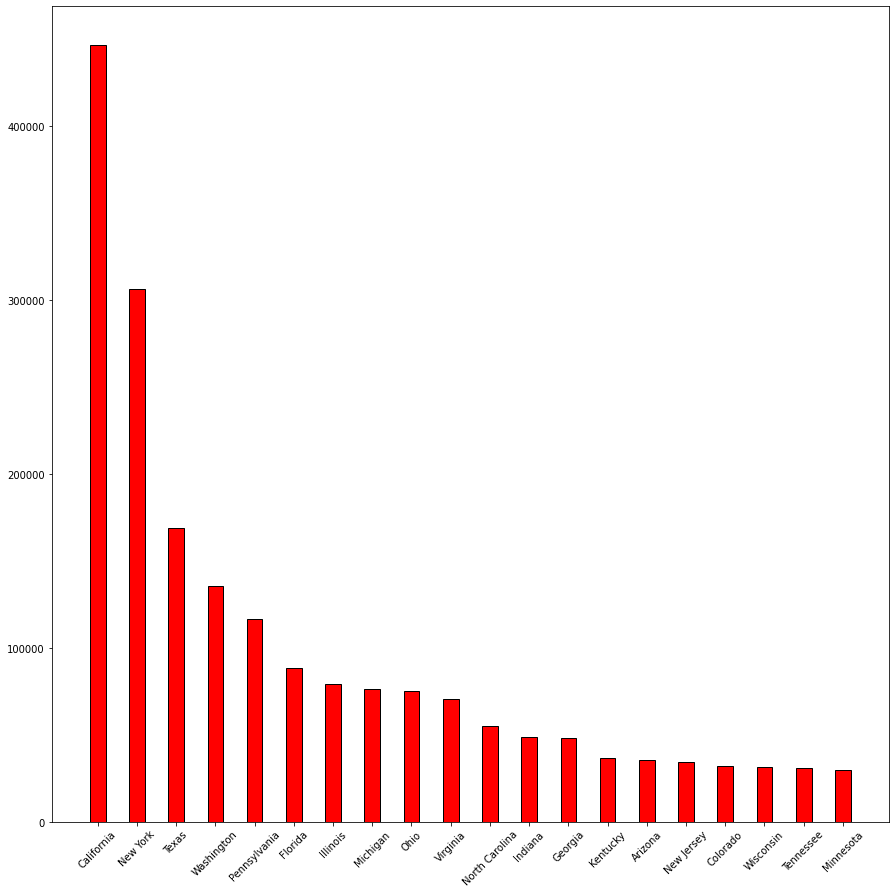

In [109]:
plt.figure(figsize = (15,15))

plt.bar(top_state.State, top_state.Sales, width = 0.4, ec = 'black', color = 'red')
plt.xticks(rotation = 45)
plt.show()

#### Lets take a look at the most preferred shipping mode

In [76]:
df['Ship Mode'].value_counts()

Standard Class    5859
Second Class      1902
First Class       1501
Same Day           538
Name: Ship Mode, dtype: int64

#### Lets take a look at the revenue generated by each category

In [81]:
rev_by_cat = df.groupby(['Category']).Sales.sum().sort_values(ascending = False).reset_index()
rev_by_cat

,Category,Sales
0,Technology,827455.8730
1,Furniture,728658.5757
2,Office Supplies,705422.3340


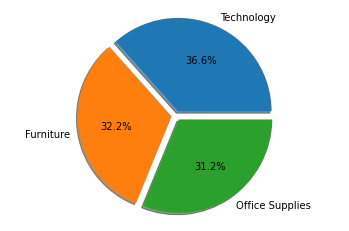

In [90]:

labels = 'Technology', 'Furniture', 'Office Supplies'
explode = (0.05 ,0.05,0.05)
sizes = rev_by_cat.Sales
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, shadow = True, startangle = 0, autopct='%1.1f%%' )
ax1.axis('equal')
plt.show()

#### Lets take a look at the 15 most bought items

In [123]:
df['Product Name'].value_counts()

Staple envelope                                                          47
Staples                                                                  46
Easy-staple paper                                                        44
Avery Non-Stick Binders                                                  20
Staple remover                                                           18
                                                                         ..
Hewlett-Packard Deskjet 5550 Printer                                      1
Xerox 1969                                                                1
Canon imageCLASS MF7460 Monochrome Digital Laser Multifunction Copier     1
Xerox 1938                                                                1
Xerox 1892                                                                1
Name: Product Name, Length: 1849, dtype: int64

In [130]:
most_bought_items= pd.DataFrame(df['Product Name'].value_counts().reset_index().head(15))

In [136]:
most_bought_items= most_bought_items.rename(columns = {'index': "Name", "Product Name": "Quantity"})
most_bought_items

,Name,Quantity
0,Staple envelope,47
1,Staples,46
2,Easy-staple paper,44
3,Avery Non-Stick Binders,20
4,Staple remover,18
5,Staples in misc. colors,18
6,KI Adjustable-Height Table,17
7,Storex Dura Pro Binders,17
8,Staple-based wall hangings,16
9,Logitech 910-002974 M325 Wireless Mouse for We...,15


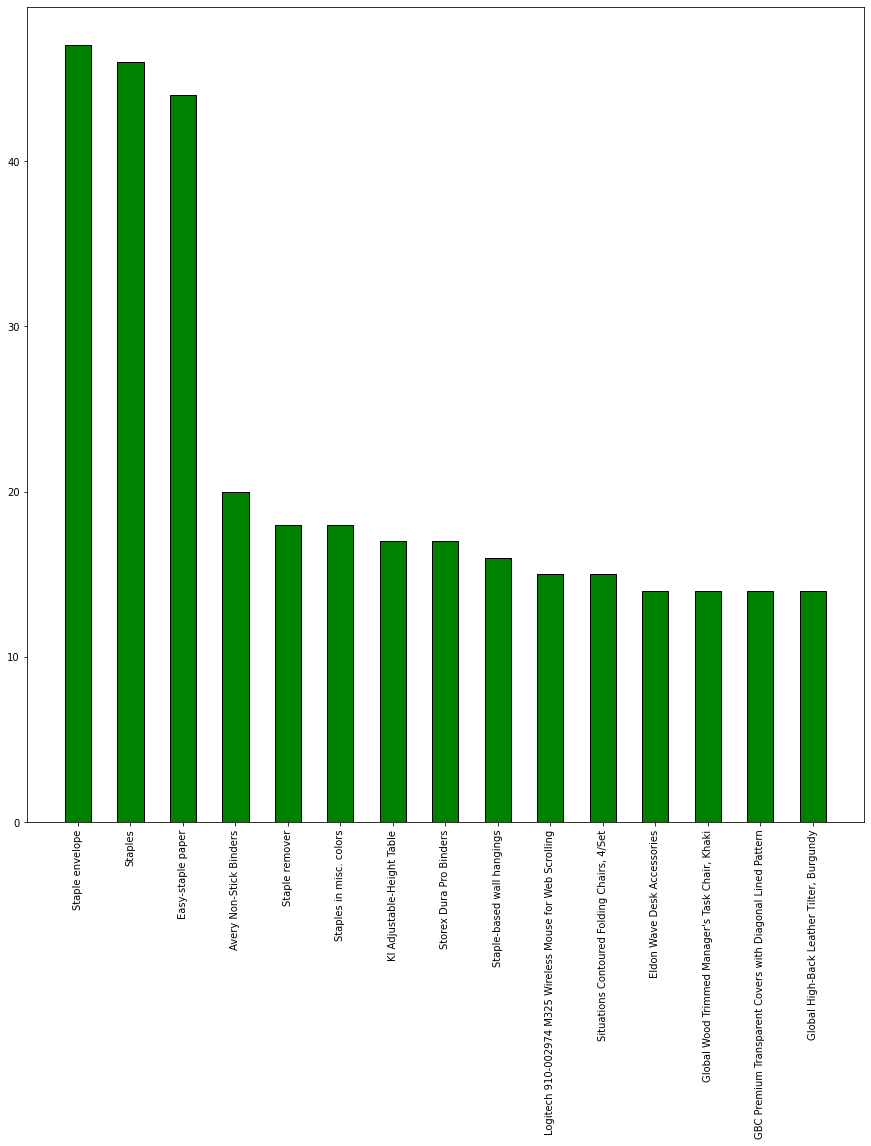

In [142]:
plt.figure(figsize = (15,15))

plt.bar(most_bought_items.Name, most_bought_items.Quantity, ec = 'black', color = 'green', width = 0.5)
plt.xticks(rotation = 90)
plt.show()

#### Lets take a look at the sales by region

In [152]:
regional_sales = pd.DataFrame(df.groupby("Region").Sales.sum()).reset_index()
regional_sales

,Region,Sales
0,Central,492646.9132
1,East,669518.7260
2,South,389151.4590
3,West,710219.6845


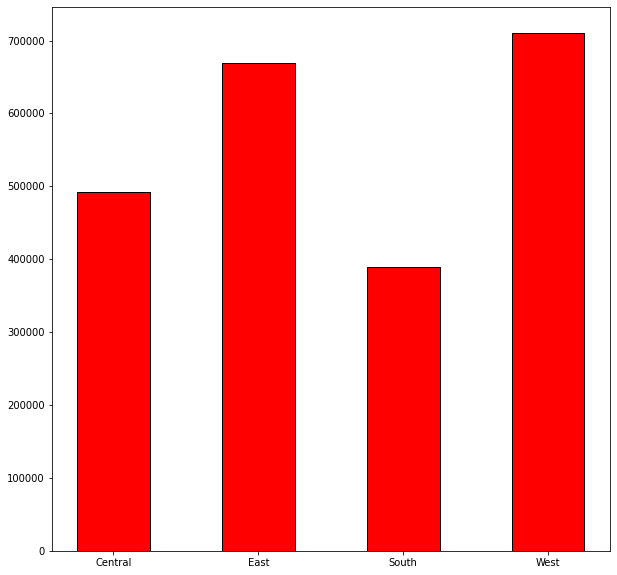

In [156]:
plt.figure(figsize = (10,10))

plt.bar(regional_sales.Region, regional_sales.Sales, ec = 'black', color = 'red', width = 0.5)
plt.show()